## Sanity test: run the VAE model on MNIST

In [ ]:
from ml.utils import load_mnist
from ml.variational_autoencoder import VariationalAutoencoder

In [ ]:
(x_train, _), (x_test, _) = load_mnist()

In [ ]:
encoder_params = [
    {"filters": 32, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 1, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (28,28,1),
    latent_dim = 8,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=1000)

In [ ]:
vae.train(
    x_train,
    batch_size=BATCH_SIZE,
    epochs=200
)

In [ ]:
plot_reconstructed_images(data=x_test, encoder=vae.encoder_model, decoder=vae.decoder_model)

## Train VAE on Lego faces

In [ ]:
import numpy as np

from ml.utils import load_lego_faces, load_model, morph_images, plot_reconstructed_images 
from ml.variational_autoencoder import VariationalAutoencoder

In [ ]:
lego_face_dict = load_lego_faces(size=64)
lego_faces = np.array(list(lego_face_dict.values()))

In [ ]:
encoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 3, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (64, 64, 3),
    latent_dim = 200,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=10000)

In [ ]:
vae.train(
    lego_faces,
    batch_size=BATCH_SIZE,
    epochs=200
)

## Do the fun stuff with the VAE

In [170]:
from ml.utils import load_lego_faces, load_model, morph_images, plot_reconstructed_images

vae = load_model(path="trained_model")

lego_face_dict = load_lego_faces(size=64)
lego_faces = np.array(list(lego_face_dict.values()))

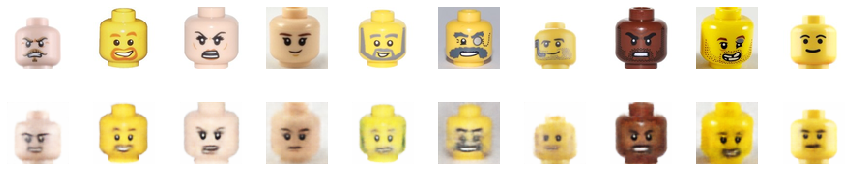

In [182]:
plot_reconstructed_images(data=lego_faces, encoder=vae.encoder_model, decoder=vae.decoder_model)

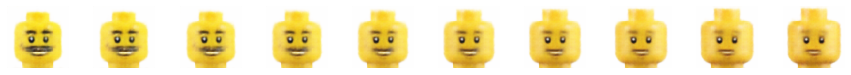

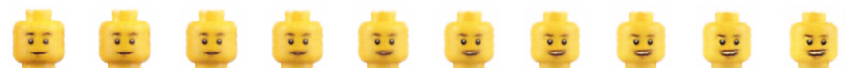

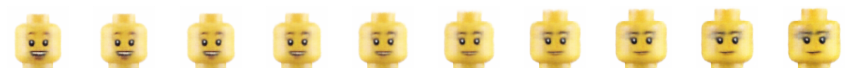

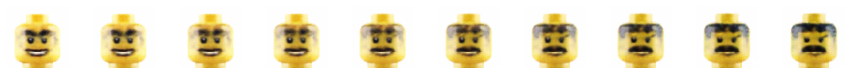

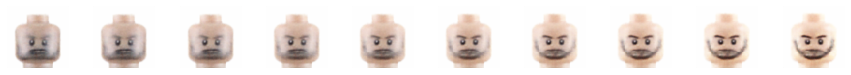

In [172]:
morph_images(
    lego_face_dict['minifigure-03568-03-2003.jpg'], 
    lego_face_dict['minifigure-05319-03-2011.jpg'],
    encoder=vae.encoder_model, 
    decoder=vae.decoder_model,
)

morph_images(
    lego_face_dict['minifigure-05317-03-2010.jpg'], 
    lego_face_dict['minifigure-01655-03-2010.jpg'],
    encoder=vae.encoder_model, 
    decoder=vae.decoder_model,
)

morph_images(
    lego_face_dict['minifigure-05424-04-2012.jpg'], 
    lego_face_dict['minifigure-05283-03-2011.jpg'],
    encoder=vae.encoder_model, 
    decoder=vae.decoder_model,
)

morph_images(
    lego_face_dict['minifigure-01332-02-2010.jpg'], 
    lego_face_dict['minifigure-00854-02-1997.jpg'],
    encoder=vae.encoder_model, 
    decoder=vae.decoder_model,
)

morph_images(
    lego_face_dict['minifigure-06287-03-2013.jpg'], 
    lego_face_dict['minifigure-01090-03-2009.jpg'],
    encoder=vae.encoder_model, 
    decoder=vae.decoder_model,
)